# Linear Support Vector Regression

### importing the main libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### importing the Dataset

In [2]:
df_data = pd.read_csv("Position_Salaries.csv")
df_data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = df_data.iloc[:,1:2].values
y = df_data.iloc[:,2:].values

 feature scaling is applied on SVR because it has an implicit equation whereas linear regression and the remaining linear models have coefficient that can compensate for the difference in values

1) we don't apply feature scaling to dummy variables
2) we don't apply feature scaling to binary variables i.e 0, 1
3) we apply feature scaling after splittin the data into training and test set

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
y = np.array(y) # transforming y to a 2d array because standardization requires a 2d array
#y = y.reshape(len(y),1)# 1 signifies 1 column and len(y) is the numbr of columns

In [6]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

### Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler
feature_transform_X = StandardScaler()
feature_transform_y = StandardScaler()
X = feature_transform_X.fit_transform(X)
y = feature_transform_y.fit_transform(y)


In [8]:
print('X values \n',X,'\n\n y values\n',y)

X values 
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

 y values
 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the whole dataset on the SVR Model

In [9]:
from sklearn.svm import SVR
y1 = list(y)
svr_model = SVR(kernel='rbf')
svr_model.fit(X,y)

/home/donxcel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting the results

In [10]:
feature_transform_y.inverse_transform(svr_model.predict
                                      (feature_transform_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

reverting back feature transform scaling, we use .inverse_transform

### Visualising the SVR Results

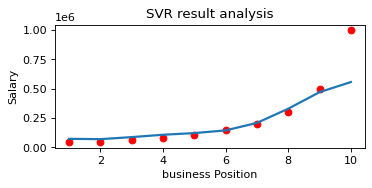

In [11]:
plt.figure(figsize=(5,2),dpi=80)
plt.title('SVR result analysis')
plt.xlabel('business Position')
plt.ylabel('Salary')
plt.scatter(feature_transform_X.inverse_transform(X),
            feature_transform_y.inverse_transform(y),color= 'red')
plt.plot(feature_transform_X.inverse_transform(X),
         feature_transform_y.inverse_transform(svr_model.predict(X).reshape(-1,1)),
         linewidth= 2
        )
plt.show()

### Visualising the SVR Results(for higher resolutions and smooother curves)

Text(0, 0.5, 'Salary')

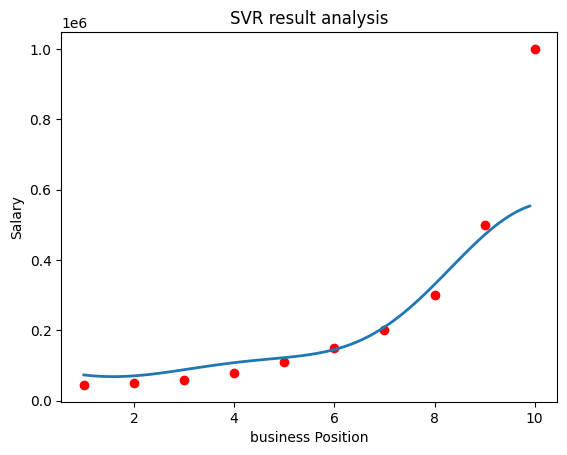

In [12]:
X_range = np.arange(min(feature_transform_X.inverse_transform(X)),
                    max(feature_transform_X.inverse_transform(X)),0.1)
X_range  = X_range.reshape(len(X_range),1)

plt.scatter(feature_transform_X.inverse_transform(X),
            feature_transform_y.inverse_transform(y),color= 'red')
plt.plot(X_range,
         feature_transform_y.inverse_transform(svr_model.predict(feature_transform_X.transform(X_range)).reshape(-1,1)),
         linewidth= 2
        )
plt.title('SVR result analysis')
plt.xlabel('business Position')
plt.ylabel('Salary')